# PISA exam´s result analysis in non-OECD counrtries
## by (Xabier Laibarra)

## Investigation Overview

> Program for International Student Assessment (PISA) is an exam that measures the Mathematics, Science and Reading level of students that are 15-16 years old and it takes place every three years. 

> As I will probably be a teacher in the future I was really interested to dig in the data of the PISA exams in order to investigate which are the factors that most condition the results of the students. In addition, it is always amazing to know which countries are the best and in which fields and what kind of charachteristics the have. I decided to analyze the non-OECD countries because I already had a slight idea of the results of OECD countries and I did not want to feel biased by the previous information I had.

## Dataset Overview

> This dataset contains information about around 500,000 students who made the PISA exam in 2012. The dateset provides a total of 635 variables, where it is possible to find the results of the exam in Mathematics, Science and Reading and a lot of further information about the personal background and characteristics of the students.

> For the analyisis in these reporst I just used the non-OECD countries and about 25 variables, which follow to get an insight about the obtained results in these countries and the factors that most influence them.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_pisa_noecd = pd.read_csv('pisa_noecd.csv',sep=',', encoding='latin-1', index_col=0, dtype='unicode').reset_index()

In [3]:
# change the data type of some columns
df_pisa_noecd['plv_meanmath'] =df_pisa_noecd['plv_meanmath'].astype(float)
df_pisa_noecd['plv_meanread']=df_pisa_noecd['plv_meanread'].astype(float)
df_pisa_noecd['plv_meanscie']=df_pisa_noecd['plv_meanscie'].astype(float)
df_pisa_noecd['birth_year']=df_pisa_noecd['birth_year'].astype(float)
df_pisa_noecd['birth_month']=df_pisa_noecd['birth_month'].astype(float)
df_pisa_noecd['class_size']=df_pisa_noecd['class_size'].astype(float)
df_pisa_noecd['disc_clim'] = df_pisa_noecd['disc_clim'].astype(float)
# reate a new overall column
df_pisa_noecd['overall_plv'] = df_pisa_noecd.iloc[:,20:23].mean(axis=1)
df_pisa_noecd.head(2)

,country,oecd,birth_month,birth_year,gender,cntry_of_birth,arrival_age,home_lang,poss_lit,poss_poet,...,pc_home,laptop_home,tablet_home,internet_home,disc_clim,par_ed,plv_meanmath,plv_meanread,plv_meanscie,overall_plv
0,United Arab Emirates,Non-OECD,8.0,1996.0,Male,Other country,4,Language of the test,Yes,Yes,...,NaN,NaN,NaN,NaN,-0.53,"ISCED 5A, 6",341.80558,288.36118,358.340537,329.502432
1,United Arab Emirates,Non-OECD,6.0,1996.0,Male,Country of test,NaN,Language of the test,No,Yes,...,NaN,NaN,NaN,NaN,-2.48,"ISCED 5A, 6",246.77520,223.72442,278.449374,249.649665


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Gender distribution

> As we are going to compare the results by gender, we make sure that the percentage of male and female are similar, so we have consistent data.

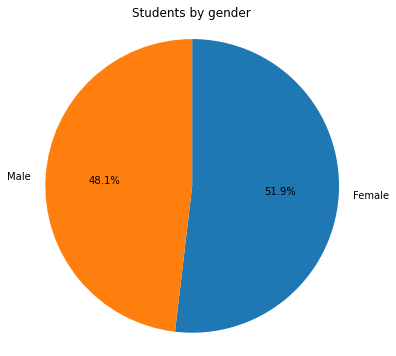

In [4]:
sort_count = df_pisa_noecd['gender'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(sort_count, labels = sort_count.index, autopct='%.1f%%', startangle = 90, counterclock = False);
plt.axis('square')
plt.title('Students by gender');

## Overall scores by gender

> As we can see the visualization female have better overall scores in all the countries except in Colombia and in Peru (with a very small difference).

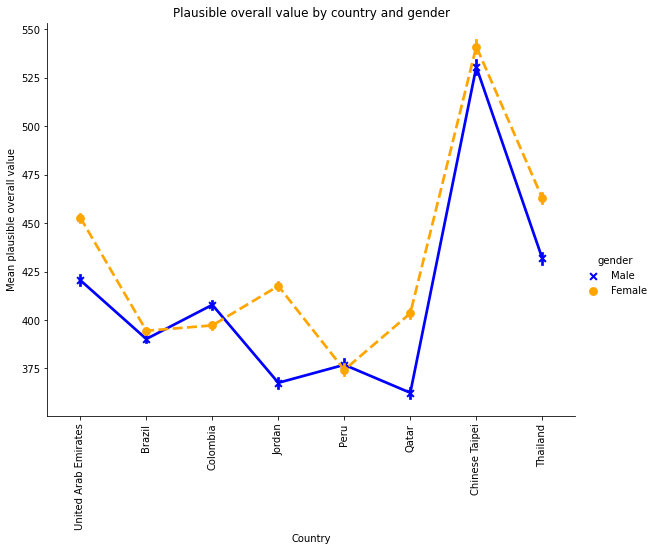

In [5]:
g=sb.catplot(x="country", y="overall_plv", hue="gender",palette={"Male": "b", "Female": "orange"},markers=["x", "o"],linestyles=["-", "--"], kind="point", data=df_pisa_noecd, height=6, aspect=8/6)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Mean plausible overall value')
plt.title('Plausible overall value by country and gender')
plt.show()

## Overall scores by country

> Best scores take place in the Chines Taipei and Thailand the worst in Peru.



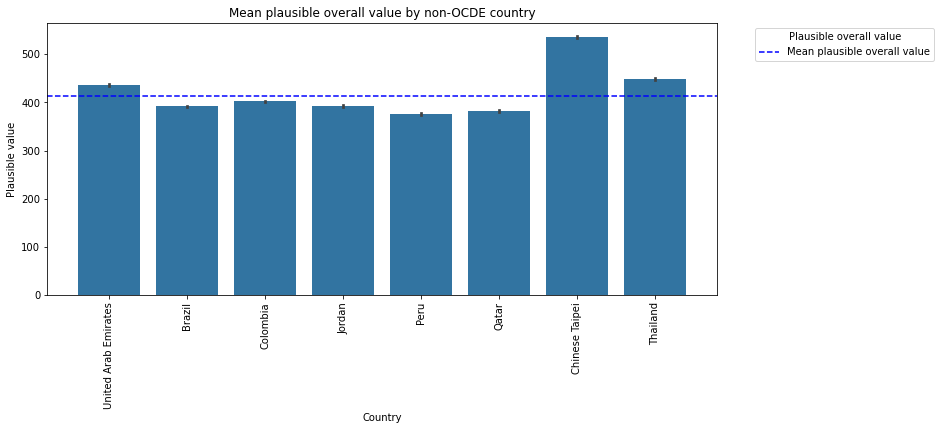

In [6]:
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
color=sb.color_palette()[0]
plt.figure(figsize=(12,5))
fontP.set_size('medium')
df_pisa1996=df_pisa_noecd
ax = sb.barplot(data = df_pisa1996, x = 'country', y = 'overall_plv',color=color)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Plausible value')
mean_plv = df_pisa_noecd['overall_plv'].mean()
plt.axhline(y = mean_plv, color = 'b', linestyle = '--') 
mean_line1996= ax.plot(mean_plv, label='Mean plausible overall value', linestyle='--', color='b')
plt.title('Mean plausible overall value by non-OCDE country')
ax.legend(title = 'Plausible overall value', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
plt.show()

## Scores by country and subject

> With the boxplot below we can compare the overall results and for each subjet between all the countries. As we can see Chinese Tapei becomes the best scores in all the subjects and Qatar the worst.

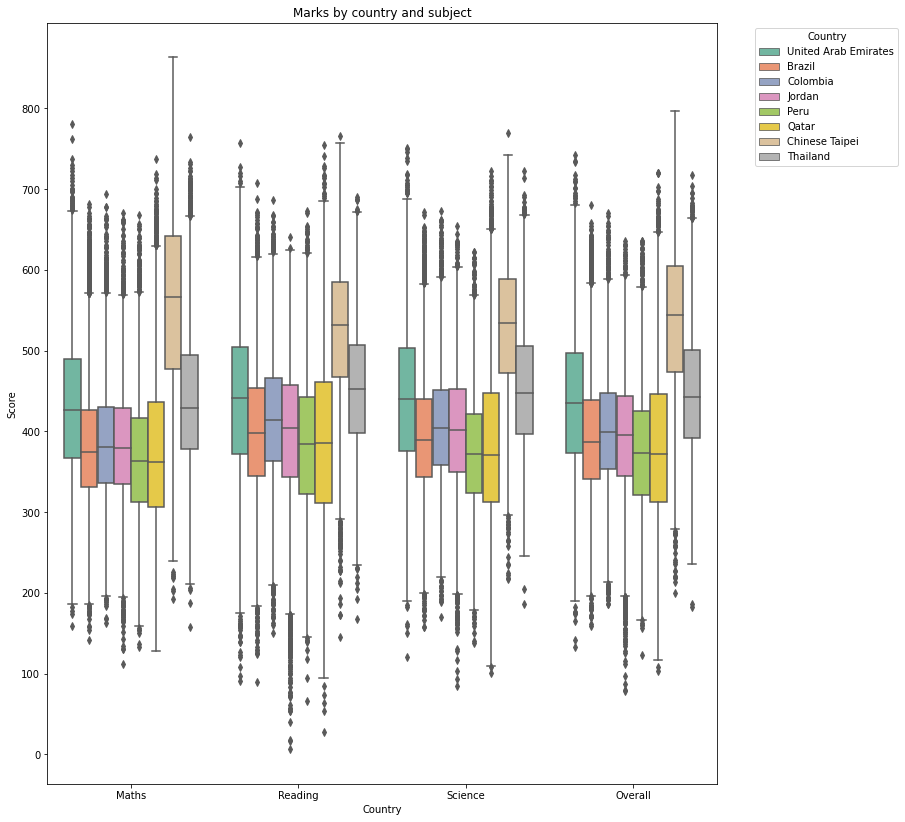

In [7]:
df_all = pd.melt(df_pisa_noecd, id_vars=['country', 'gender', 'birth_year'], value_vars=['plv_meanmath','plv_meanread','plv_meanscie','overall_plv'], var_name="Country", value_name='Score')
df_all['Country'] = df_all['Country'].replace('overall_plv', 'Overall').replace('plv_meanmath','Maths').replace('plv_meanread','Reading').replace('plv_meanscie','Science')

plt.figure(figsize=[12, 14]);
ax=sb.boxplot(x = df_all['Country'], y = df_all['Score'], hue=df_all['country'], palette = sb.color_palette('Set2'))
ax.legend(title = 'Country', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
plt.title('Marks by country and subject');
y_ticks = np.arange(0, 850, 100)
plt.yticks(y_ticks, y_ticks);

## Students distribution by scores and discpline climate

> Looking at the heat map below it is possible to see that there is a strong correlation we can appreciate the stron correlation between the students with better marks and the discipline climate. The students amount with good scores decreases with the discipline climate at home and increases with it.

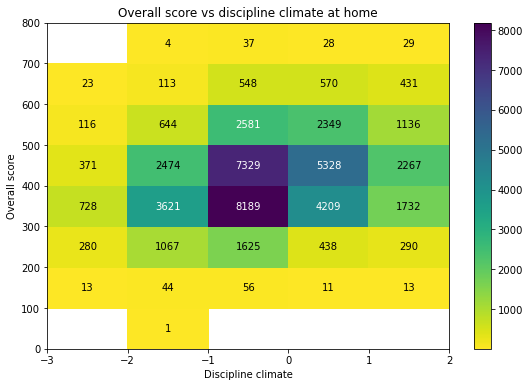

In [8]:
bins_x = np.arange(-3, 2.5, 1)
bins_y = np.arange(0, 850, 100)
plt.figure(figsize=(9,6))
ax=plt.hist2d(data = df_pisa_noecd, x = 'disc_clim', y = 'overall_plv', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Discipline climate')
plt.ylabel('Overall score')
plt.title('Overall score vs discipline climate at home')

amount = ax[0]
for i in range(amount.shape[0]):
    for j in range(amount.shape[1]):
        a = amount[i,j]
        if a >= 2500: 
            plt.text(bins_x[i]+0.5, bins_y[j]+50, int(a),
                     ha = 'center', va = 'center', color = 'white')
        elif a > 0:
            plt.text(bins_x[i]+0.5, bins_y[j]+50, int(a),
                     ha = 'center', va = 'center', color = 'black')

## Interest in Mathematicas by country

> In the bar plot below there are couple of curious facts that caught our attention. The first one is tha the Chinese Taipei is the country with the highest rate with *disagree* reagarding the math interest. However they are the country with the highest scores (see box plot above). On the other hand, there is Jordan, which has the highes rate regarding *strongly agree* and *agree* percentages but the corresponding scores are the lowest of all the analyzed countries.

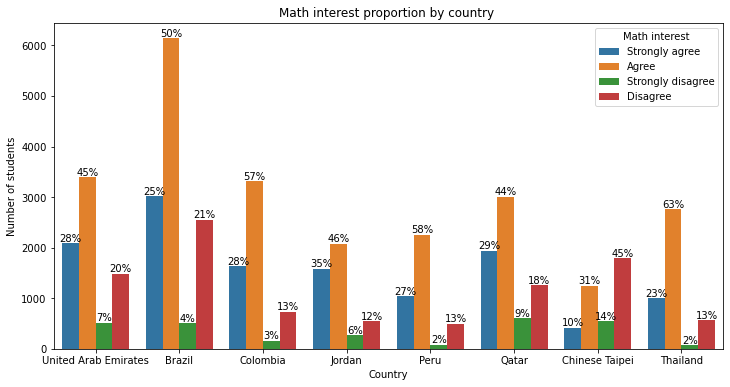

In [9]:
def barPerc(df,xVar,hueVar,ax):
    
    numHues=len(df.dropna(subset=[hueVar])[hueVar].unique())
    numX=len(df.dropna(subset=[xVar])[xVar].unique())
    
    bars = ax.patches
    for ind in range(numX):
        
        hueBars=bars[ind:][::numX]
        total = sum([x.get_height() for x in hueBars])

        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height() + 40,
                    '{0:.0%}'.format(bar.get_height()/total), ha="center")
            
plt.figure(figsize=(12,6))
ax = sb.countplot(x ='country', hue = "math_int", data = df_pisa_noecd)
ax.set_ylabel('Number of students')
ax.set_xlabel('Country')
ax.legend(title='Math interest')
plt.title('Math interest proportion by country ')
barPerc(df_pisa_noecd,'country','math_int',ax)

## Students score by home language

> As the violin plot shows, the students who do not speak the language of the test at home have better results in all the subjects than those that they do. We also have to mention that the sample of students who speak other language at home is much smaller than the one of the students who speak the exam language at home (wich could have biased the result).

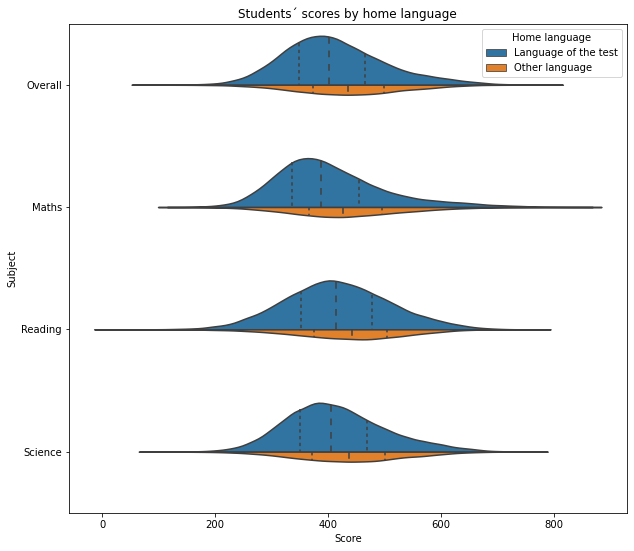

In [10]:
df_lang = pd.melt(df_pisa_noecd, id_vars=['gender', 'birth_year', 'country', 'home_lang'],value_vars=['overall_plv','plv_meanmath','plv_meanread','plv_meanscie'], var_name="Subject", value_name='Score')
df_lang['Subject'] = df_lang['Subject'].replace('overall_plv', 'Overall').replace('plv_meanmath','Maths').replace('plv_meanread','Reading').replace('plv_meanscie','Science')
color = sb.color_palette()

plt.figure(figsize = [10, 9])
ax = sb.violinplot(x = 'Score', y='Subject', hue='home_lang',data=df_lang, palette=color, split=True,scale="count", inner="quartile");

x_ticks = np.arange(0, 800 + 1, 100)
ax.legend(title = 'Home language')
plt.title("Students´ scores by home language");

## Mean scores by class size and subject

> As we can see on the line plot the best results correspond to class sizes between 40-45 students, which is a big number and which goes against the logic. However, we can see in the bar plot below that the Chinese Taipei, the country with best results, has the biggest class sizes. This fact is a contradiction against the traditional thinking that smaller class sizes bring better results, hence, higher scores.

In [11]:
df_pisa_class= df_pisa_noecd[(df_pisa_noecd['class_size']>14) & (df_pisa_noecd['class_size']<46)]
df_pisa_class['class_size'].describe()

count    39157.000000
mean        30.680032
std          7.497652
min         15.000000
25%         25.000000
50%         30.000000
75%         37.000000
max         45.000000
Name: class_size, dtype: float64

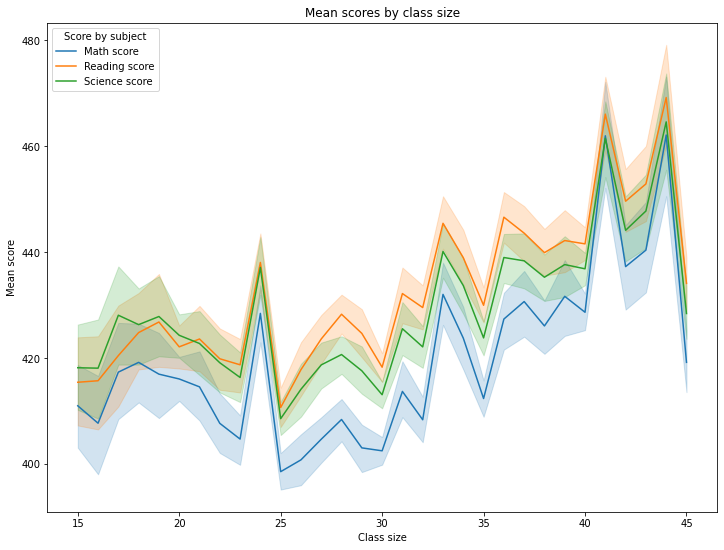

In [12]:
plt.figure(figsize=(12,9))
sb.lineplot(data=df_pisa_class,x='class_size',y='plv_meanmath',label='Math score')
sb.lineplot(data=df_pisa_class,x='class_size',y='plv_meanread',label='Reading score')
sb.lineplot(data=df_pisa_class,x='class_size',y='plv_meanscie',label='Science score')
plt.xlabel('Class size')
plt.ylabel('Mean score')
plt.legend(title='Score by subject', loc=2)
plt.title('Mean scores by class size');

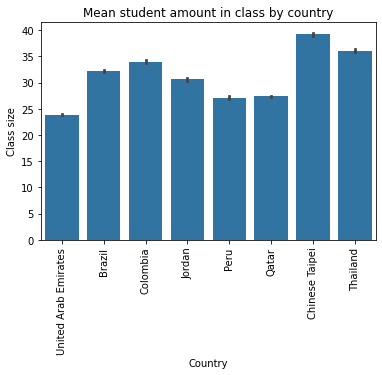

In [13]:
color=sb.color_palette()[0]
ax = sb.barplot(data = df_pisa_noecd, x = 'country', y = 'class_size',color=color)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Class size')
plt.title('Mean student amount in class by country')
plt.show()